# Convergence of Integrals

## Lebesgue Measure Zero

A set has **Lebesgue measure zero** if it is "negligibly small" in the sense that it can be covered by intervals whose total length can be made arbitrarily small. Formally:

A set $A \subset \mathbb{R}$ has Lebesgue measure zero if, for every $\epsilon > 0$, there exists a collection of intervals $\{I_k\}_{k=1}^\infty$ such that:

1. $A \subset \bigcup_{k=1}^\infty I_k$, and
2. $\sum_{k=1}^\infty |I_k| < \epsilon$,

where $|I_k|$ is the length of the interval $I_k$.

### Importance of Lebesgue Measure Zero in Integrals

Lebesgue measure zero ensures that the failure of convergence on a small set $A$ does not impact the integral:

$$
\int_{-\infty}^\infty f_n(x) \, dx \to \int_{-\infty}^\infty f(x) \, dx,
$$

as long as $f_n(x)$ and $f(x)$ are well-behaved outside the set $A$. 

In other words, it ensures that, for a given value of x, the Lebesgue measure is sufficiently small (the range between $y_{k-1}$ and $y_k$ is almost zero) such that the behaviour of the integral on that part is negligible in relation to the entire integral.

### Examples:

1. A single point in $\mathbb{R}$ has Lebesgue measure zero because it has no length.
2. A finite or countable set of points (e.g., the rational numbers in any interval) also has Lebesgue measure zero because we can cover them with intervals whose total length approaches zero.

## Convergence Almost Everywhere

### Convergence almost everywhere in the context of random variables

#### Definition

In the context of sequences of random variables, **convergence almost everywhere** refers to the property where a sequence of random variables $\{X_n\}$ defined on the same probability space $(\Omega, \mathcal{F}, P)$ converges almost surely to $X$ if:

$$
\lim_{n \to \infty} X_n = X \text{ almost surely, i.e., } P\left(\{ \omega \in \Omega : \lim_{n \to \infty} X_n(\omega) = X(\omega) \}\right) = 1.
$$

#### Example: Strong Law of Large Numbers

An intuitive example of almost sure convergence is the **Strong Law of Large Numbers**. Consider independent coin tosses with probability $p = \frac{1}{2}$ of heads. Define:

$$
Y_k(\omega) =
\begin{cases}
1, & \text{if } W_k = H, \\
0, & \text{if } W_k = T,
\end{cases}
$$

and let $H_n$ be the total number of heads in the first $n$ tosses:

$$
H_n = \sum_{k=1}^n Y_k.
$$

The theorem asserts:

$$
\lim_{n \to \infty} \frac{H_n}{n} = \frac{1}{2} \text{ almost surely}.
$$

This implies that the ratio of heads to tosses approaches $\frac{1}{2}$ almost surely.

We can see this with the following PY code:

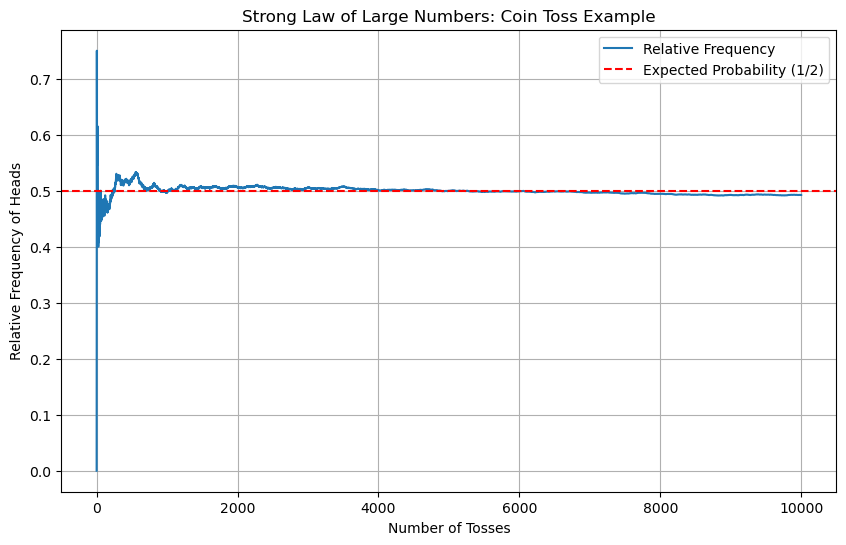

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Number of coin tosses
n_tosses = 10_000

# Simulate coin tosses (1 for Heads, 0 for Tails)
np.random.seed(42)  # For reproducibility
coin_tosses = np.random.choice([0, 1], size=n_tosses, p=[0.5, 0.5])

# Calculate cumulative sum and relative frequency
cumulative_heads = np.cumsum(coin_tosses)
relative_frequency = cumulative_heads / np.arange(1, n_tosses + 1)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(relative_frequency, label="Relative Frequency")
plt.axhline(0.5, color="red", linestyle="--", label="Expected Probability (1/2)")
plt.xlabel("Number of Tosses")
plt.ylabel("Relative Frequency of Heads")
plt.title("Strong Law of Large Numbers: Coin Toss Example")
plt.legend()
plt.grid()
plt.show()


### Convergence almost everywhere in the context of function sequences

In the context of function sequences, **convergence almost everywhere** refers to the property where a sequence of functions $\{f_n(x)\}$ converges to a function $f(x)$ for all $x \in \mathbb{R}$, except on a set of points with Lebesgue measure zero.

#### Definition:

The sequence $\{f_n(x)\}$ converges to $f(x)$ **almost everywhere** if:

$$
\lim_{n \to \infty} f_n(x) = f(x) \quad \text{for all } x \in \mathbb{R} \setminus A,
$$

where $A$ is a set of Lebesgue measure zero.

#### Key Intuition:

- The set $A$ (where convergence fails) is negligibly small, so it does not affect the overall behavior of the sequence.
- In practical terms, this means the sequence $\{f_n(x)\}$ converges to $f(x)$ for "almost all" points in $\mathbb{R}$.

#### Example: Convergence of Normal Densities

Consider a sequence of normal densities $\{f_n(x)\}$ with mean $0$ and variance $\frac{1}{n}$:

$$
f_n(x) = \frac{1}{\sqrt{2 \pi / n}} e^{-nx^2 / 2}.
$$

1. For $x \neq 0$, $\lim_{n \to \infty} f_n(x) = 0$.
2. For $x = 0$, $\lim_{n \to \infty} f_n(0) = \infty$.

The sequence $\{f_n(x)\}$ converges almost everywhere to the function $f(x)$ defined as:

$$
f(x) =
\begin{cases}
0, & x \neq 0, \\
\infty, & x = 0.
\end{cases}
$$

The set $A = \{0\}$, where convergence fails, has Lebesgue measure zero, so $\{f_n(x)\}$ converges to $f(x)$ **almost everywhere**.



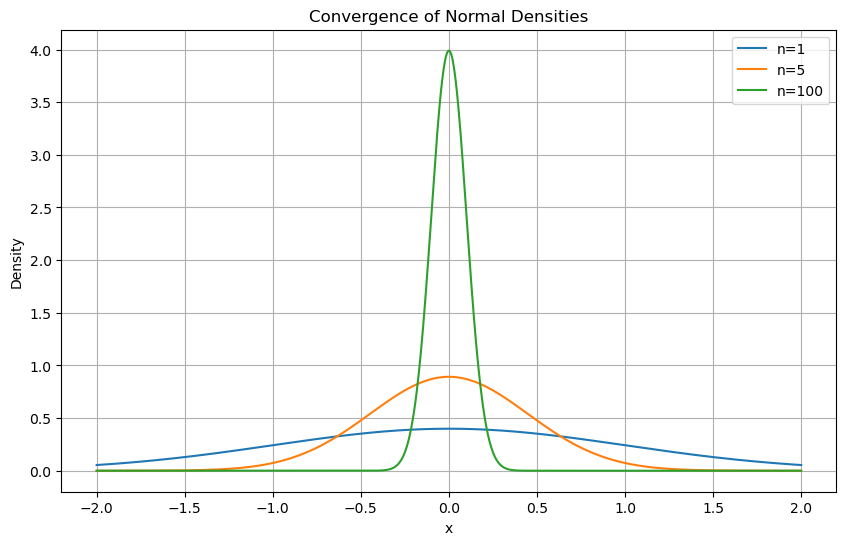

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the normal density function
def normal_density(x, n):
    variance = 1 / n
    return (1 / np.sqrt(2 * np.pi * variance)) * np.exp(-n * x**2 / 2)

# Generate x values
x = np.linspace(-2, 2, 1000)

# Calculate densities for n = 1, 5, 100
densities = {
    "n=1": normal_density(x, 1),
    "n=5": normal_density(x, 5),
    "n=100": normal_density(x, 100),
}

# Plot the densities
plt.figure(figsize=(10, 6))
for label, density in densities.items():
    plt.plot(x, density, label=label)

# Add labels, title, and legend
plt.title("Convergence of Normal Densities")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()


## Monotone Convergence

**Monotone Convergence** ensures that if a sequence of random variables or functions satisfies **specific monotonicity and boundedness conditions**, then the integral (or expectation) of their limit is equal to the limit of their integrals (or expectations).

### Formal Statement

#### For Random Variables:

Let $\{X_n\}$ be a sequence of random variables. If:

1. $\{X_n\}$ converges almost surely to a random variable $X$, and  
2. $\{X_n\}$ is non-decreasing, i.e.,

$$
0 \leq X_1 \leq X_2 \leq \cdots \leq X_n \leq X \quad \text{almost surely},
$$

then:

$$
\lim_{n \to \infty} \mathbb{E}[X_n] = \mathbb{E}[X].
$$

#### For Functions:

Let $\{f_n(x)\}$ be a sequence of functions defined on $\mathbb{R}$. If:

1. $\{f_n(x)\}$ converges almost everywhere to a function $f(x)$, and  
2. $\{f_n(x)\}$ is non-decreasing, i.e.,

$$
0 \leq f_1(x) \leq f_2(x) \leq \cdots \quad \text{almost everywhere},
$$

then:

$$
\lim_{n \to \infty} \int_{-\infty}^\infty f_n(x) \, dx = \int_{-\infty}^\infty f(x) \, dx.
$$

### Key Intuition

1. **Monotonicity**: The condition $f_1(x) \leq f_2(x) \leq \cdots$ ensures that the functions (or random variables) grow in a controlled way. There is no oscillation or decrease.
   
2. **Limit Behavior**: The limit function $f(x)$ or random variable $X$ is the "ultimate" value that $\{f_n(x)\}$ or $\{X_n\}$ approaches.

3. **Area Under the Curve**: Think of the integral $\int_{-\infty}^\infty f_n(x) \, dx$ as the "area under the curve." As $n$ increases, we keep adding more area (or expectations) without removing any, ensuring convergence.

### Example

#### Sequence of Functions:

Consider the sequence of functions $\{f_n(x)\}$ on $[0, 1]$:

$$
f_n(x) = n \cdot x^n, \quad \text{for } x \in [0, 1].
$$

1. For each $n$, $f_n(x)$ is non-negative and $f_n(x) \leq f_{n+1}(x)$ for all $x$.
2. As $n \to \infty$, $f_n(x)$ converges to:

$$
f(x) =
\begin{cases}
0, & x \in [0, 1), \\
\infty, & x = 1.
\end{cases}
$$

Thus, the integral converges to the limit:

$$
\int_0^1 f_n(x) \, dx \to \int_0^1 f(x) \, dx = 0.
$$

### Corollary

If a nonnegative random variable $X$ takes countably many values $\{x_k\}$, then:

$$
\mathbb{E}[X] = \sum_{k=0}^\infty x_k \cdot P(X = x_k).
$$

---

## Dominated Convergence

Let $\{X_n\}$ be a sequence of random variables converging almost surely to $X$. If there exists a random variable $Y$ such that:

$$
\mathbb{E}[|Y|] < \infty \quad \text{and} \quad |X_n| \leq Y \quad \text{almost surely for all } n,
$$

then:

$$
\lim_{n \to \infty} \mathbb{E}[X_n] = \mathbb{E}[X].
$$

For a sequence of functions $\{f_n\}$ on $\mathbb{R}$, if there exists a function $g(x)$ such that:

$$
\int_{-\infty}^\infty g(x) \, dx < \infty \quad \text{and} \quad |f_n(x)| \leq g(x) \quad \text{almost everywhere for all } n,
$$

then:

$$
\lim_{n \to \infty} \int_{-\infty}^\infty f_n(x) \, dx = \int_{-\infty}^\infty f(x) \, dx.
$$
